<a href="https://colab.research.google.com/github/iamatul1214/Tensorflow_Certification_Preparation/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


### Let's try to create some synthetic data here


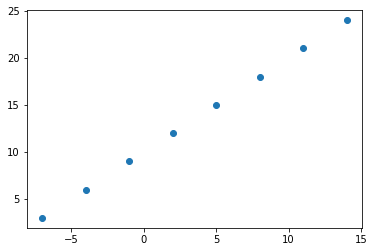

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# creating features
x = np.array([-7.0,-4.0,-1.0,2,5,8,11,14])

# creating labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#visualize it
plt.scatter(x,y)

In [3]:
## converting the arrays into tensors
x_tensor = tf.constant(x)
y_tensor = tf.constant(y)
x_tensor,y_tensor

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

### Steps in modeling with tensorflow
1. Creating a model- define the input, output and hidden layers.
2. Compiling a model- Define the loss function which tells our model how wrong it is. Optimizer tells your model how to improve the pattern it is leaning and evaluation metrics.
3. Fitting a model: training the model. 

In [4]:
## set random seed
tf.random.set_seed(42)

## 1. create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)   ## as we will only pass 1
])

## 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

## 3. Fitting the model
model.fit(tf.expand_dims(x,axis=1),y, epochs= 5)  ## expanding the dimensions of input so that it can be converted into batches

Epoch 1/5
1/1 [==============================] - 1s 515ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


## Above we used loss and metrics to be same and that's why we can see loss: and mae: values to be same for every epoch. Let's try to predict and check .

In [5]:
tf.expand_dims(x,axis=1)

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [6]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Another way of creating models


In [7]:
## set random seed
tf.random.set_seed(42)

## 1. create a model using sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

## 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

## 3. Fitting the model
model.fit(tf.expand_dims(x,axis=1),y, epochs= 5)  ## expanding the dimensions of input so that it can be converted into batches

Epoch 1/5
1/1 [==============================] - 0s 288ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


## As we observed up that prediction is not that good, Let's see now how can we increase the prediction accuracy

### Steps we can do to improve our model
1. **while creating a model** - We may add more layers, increase the neurons in hidden layers, change the activation function
2. **Compiling the model** - Here we can change the optimization function or the **learning rate** of it.
3. **Fitting a model** - Here we can fit a model for more epochs, or more data examples to learn

In [8]:
## creating another version of the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

## compiling
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

## fitting the model on 100 epochs

model.fit(tf.expand_dims(x, axis=1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 292ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] -

In [9]:
model.predict([17.0]) ## we can see that the output is somewhat closer than what we expect

array([[29.739855]], dtype=float32)

In [10]:
## Let's create another set of model with different configurations
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(tf.expand_dims(x, axis=1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 393ms/step - loss: 14.6059 - mae: 14.6059
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 14.3084 - mae: 14.3084
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 14.0240 - mae: 14.0240
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 13.7479 - mae: 13.7479
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 13.4755 - mae: 13.4755
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2026 - mae: 13.2026
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 12.9247 - mae: 12.9247
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 12.6375 - mae: 12.6375
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 12.3363 - mae: 12.3363
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0160 - mae: 12.0160
Epoch 11/100
1/1 [==============================]

In [11]:
model.predict([17.0])

array([[21.965601]], dtype=float32)

In [12]:
## trying the same configuration with different optimizers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics = ['mae']
              )

model.fit(tf.expand_dims(x,axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 416ms/step - loss: 19.5326 - mae: 19.5326
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 19.5274 - mae: 19.5274
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 19.5222 - mae: 19.5222
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 19.5169 - mae: 19.5169
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 19.5117 - mae: 19.5117
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 19.5064 - mae: 19.5064
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 19.5012 - mae: 19.5012
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 19.4960 - mae: 19.4960
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 19.4908 - mae: 19.4908
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 19.4855 - mae: 19.4855
Epoch 11/100
1/1 [==============================] - 0s 

In [13]:
model.predict([17.0])

array([[-20.367725]], dtype=float32)

## Looks like ADAM optimizer is not working for us but let's try with other learning rate

In [14]:
## trying the same configuration with different optimizers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['mae']
              )

model.fit(tf.expand_dims(x,axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 933ms/step - loss: 12.7997 - mae: 12.7997
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 12.5182 - mae: 12.5182
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.2424 - mae: 12.2424
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.9697 - mae: 11.9697
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 11.6988 - mae: 11.6988
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 11.4275 - mae: 11.4275
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 11.1529 - mae: 11.1529
Epoch 8/100
1/1 [==============================] - 0s 32ms/step - loss: 10.8723 - mae: 10.8723
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 10.5838 - mae: 10.5838
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 10.2859 - mae: 10.2859
Epoch 11/100
1/1 [==============================] - 

In [15]:
model.predict([17.0])

array([[26.73691]], dtype=float32)

### In practice we always follow this workflow:
```
Build a model -> fill it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweat a model -> fit it -> evaluate it...
```

### When it comes to evaluation we should always remember:
> "visualize, visualize, visualize"

It's a good idea to visulize:
* The data - what data we are working with? what does it look like?
* The model itself - What does our model look like ?
* The training of a model - how does model perform while it learns?
* The predictions of the model - How do predicitons of a model look like when lined up against the ground truth

In [16]:
## Let's make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [17]:
## making labels for our dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

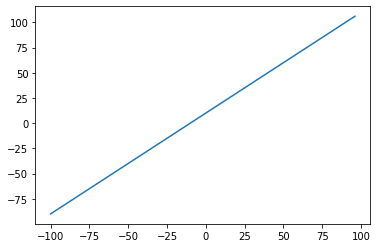

In [18]:
## Let's visualize the data
import matplotlib.pyplot as plt
plt.plot(X,y)

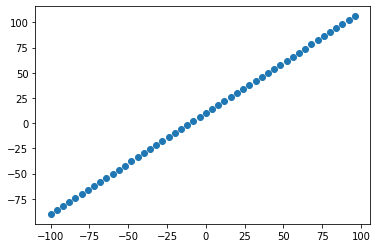

In [19]:
plt.scatter(X,y)

### The 3 sets
* **Training set** The training set is the data on which the model is trained, it is typically 70% to 80% of the full dataset.
* **Validation set** The validation set is the data by validation on whose we tweak the model. It is 10% to 15% of the total dataset.
* **Test set** The test set is the final test through which model is evaluated. It is also 10% to 15% of the total dataset.


In [20]:
## Here we will only split into train and test splits because of smaller set
x_train = X[:40]  ## first 40 for training around 80%
y_train = y[:40]
x_test = X[40:] ## last 10 for testing around 20%
y_test = y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


[]

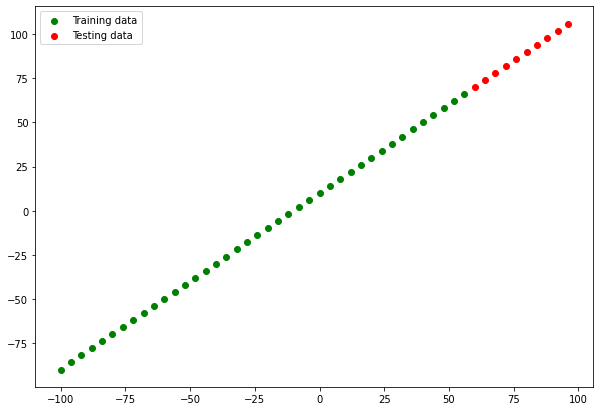

In [21]:
## Let's visualize our training and testing set
plt.figure(figsize=(10,7))
## training data in green
plt.scatter(x_train,y_train, c="g", label="Training data")
## testing data in red
plt.scatter(x_test,y_test, c="R", label="Testing data")
plt.legend()
plt.plot()

In [22]:
## Creating a basic model and visualizing it

## creating 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

## compiling
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

## let's not fit it right now

In [23]:
try:
  model.summary()
except Exception as e:
  print(e)

This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.


### Now the above error came because the model has not defined with any input shape, so tf can automatically define the input shape when we run the model for training. But in order to check the model architecture or summary we need to either build the model first with training data or include input shape argument while creating the model.

In [24]:
## creating another model from scratch with input shape
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# model.fit(tf.expand_dims(x_train), y_train, epochs = 100)

In [25]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


As we know once neuron has one weight and one bias hence overall two trainable parameters.

* **Total params** = Total number of paramters in the model
* **Trainable parameters** = These are the paramters model will update when it trains.
* **Non-trainable parameters** = These paramters aren't updated during training these are used when we use transfer learning and don't retrain the pretrained layers.

In [26]:
model.fit(tf.expand_dims(x_train, axis=1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 21.5127 - mae: 21.5127
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 9.8784 - mae: 9.8784
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.3224 - mae: 11.3224
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 9.5330 - mae: 9.5330
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 10.4384 - mae: 10.4384
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 9.6676 - mae: 9.6676
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 8.7680 - mae: 8.7680
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0557 - mae: 9.0557
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 19.2566 - mae: 19.2566
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.3912 - mae: 10.3912
Epoch 11/100
2/2 [==============================] - 0s 10ms/st

In [27]:
## creating different model and checking its paramter but not executing
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

## compiling
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])


In [28]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               200       
                                                                 
 dense_15 (Dense)            (None, 50)                5050      
                                                                 
 dense_16 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


### Simple explaination of the parameters--
> layer 1 =  100 neurons = 100 weights + 100 biases = 200 params
> layers 2 = 50 neurons = each neuron from layer 1 multiplying to each neuron of layer 2. Hence, 100 * 50 = 5000 weights of layer 2 + 50 bias of each 50 neurons on layer 2.
> layer 3 =  1 neuron = each neuron from layer 2 multiplying to each neuron of layer 3. Hence, 50 * 1= 50 weights of layer 3 and 1 bias of 1 neuron on layer 3.

In [29]:
model.fit(tf.expand_dims(x_train, axis=1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 50.8430 - mae: 50.8430
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 32.8333 - mae: 32.8333
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 18.5013 - mae: 18.5013
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 17.1915 - mae: 17.1915
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 33.3424 - mae: 33.3424
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 17.2292 - mae: 17.2292
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 23.2570 - mae: 23.2570
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9495 - mae: 14.9495
Epoch 9/100
2/2 [==============================] - 0s 30ms/step - loss: 33.8715 - mae: 33.8715
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 17.1566 - mae: 17.1566
Epoch 11/100
2/2 [==============================] - 0

In [30]:
## Let's create one more model and more neurons and some complex structure and check
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1]),
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(15),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])


In [31]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 50)                100       
                                                                 
 dense_18 (Dense)            (None, 30)                1530      
                                                                 
 dense_19 (Dense)            (None, 15)                465       
                                                                 
 dense_20 (Dense)            (None, 8)                 128       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,232
Trainable params: 2,232
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(tf.expand_dims(x_train,axis=1),y_train,epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 83.8398 - mae: 83.8398
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 64.0369 - mae: 64.0369
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 59.0906 - mae: 59.0906
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 79.3087 - mae: 79.3087
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 47.8964 - mae: 47.8964
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10003.8496 - mae: 10003.8496
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: inf - mae: inf                        
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: nan - mae: nan
Epoch 9/100
2/2 [==============================] - 0s 36ms/step - loss: nan - mae: nan
Epoch 10/100
2/2 [==============================] - 0s 25ms/step - loss: nan - mae: nan
Epoch 11/100
2/2 [==============================] - 0s 1

In [33]:

## creating a more custom model with custom names of model and layers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], name="First_hidden_layer"),
    tf.keras.layers.Dense(25, name="Second_hidden_layer"),
    tf.keras.layers.Dense(5,name="Third_hidden_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="My_Custom_model")

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])


In [34]:
model.summary()

Model: "My_Custom_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_hidden_layer (Dense)  (None, 50)                100       
                                                                 
 Second_hidden_layer (Dense)  (None, 25)               1275      
                                                                 
 Third_hidden_layer (Dense)  (None, 5)                 130       
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 1,511
Trainable params: 1,511
Non-trainable params: 0
_________________________________________________________________


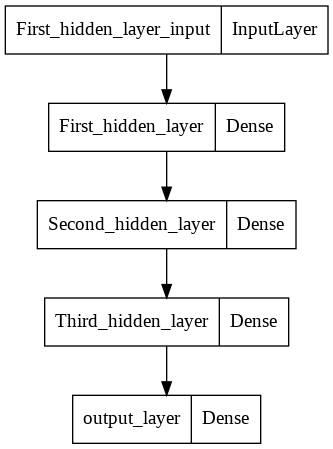

In [35]:
from tensorflow.keras.utils import plot_model

plot_model(model=model)

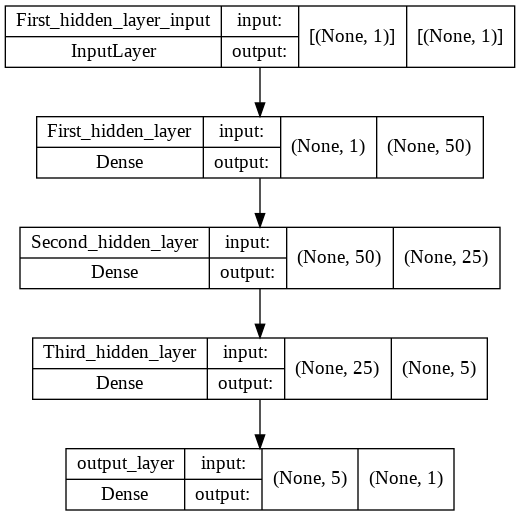

In [36]:
plot_model(model=model, show_shapes=True)

## Let's give it a try to visualize our predictions, so let's predict on x_test and compare it with y_testm with a beautifull visualization

In [37]:
## prediting first
y_pred = model.predict(x_test)
y_pred

array([[-17.849314],
       [-19.039263],
       [-20.229223],
       [-21.419174],
       [-22.609129],
       [-23.799082],
       [-24.98904 ],
       [-26.178986],
       [-27.36895 ],
       [-28.558899]], dtype=float32)

In [38]:
## Let's convert the y_pred into the tensors
y_pred = tf.constant(y_pred)
y_pred,y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[-17.849314],
        [-19.039263],
        [-20.229223],
        [-21.419174],
        [-22.609129],
        [-23.799082],
        [-24.98904 ],
        [-26.178986],
        [-27.36895 ],
        [-28.558899]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [39]:
## Let's create a function to plot 

def plot_evaluation(train_data = x_train, train_label=y_train, test_data=x_test, test_label=y_test, prediction = y_pred):
  plt.figure(figsize=(10,7))
  ## plotting the train set
  plt.scatter(train_data, train_label, c="g", label="training data")
  ## plotting the test set
  plt.scatter(test_data,test_label, c="b",label="testing data")
  ## plotting the predictions w.r.t to test labels
  plt.scatter(prediction,test_label, c="r", label="prediction data")
  plt.legend()
  plt.plot()

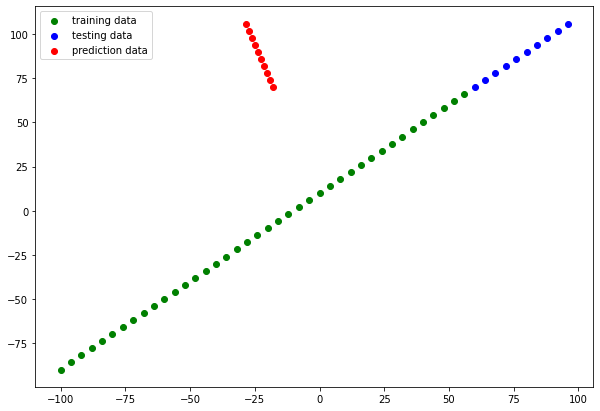

In [40]:
plot_evaluation()

In [41]:
## Let's evaluate the model
model.evaluate(x_test,y_test)   ## It will show mae because we chose mae as loss and mae as metrics while creating model

1/1 [==============================] - 0s 430ms/step - loss: 111.2041 - mae: 111.2041


[111.2041015625, 111.2041015625]

In [42]:
## calculating the mean absoulte error 
mae = tf.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([105.84932 , 107.03926 , 108.229225, 109.419174, 110.60913 ,
       111.79909 , 112.98904 , 114.17898 , 115.36894 , 116.5589  ],
      dtype=float32)>

### Our mae is not as same as model.evaluate() output that is because the y_pred has different shape than the y_test. So let's decrese the dimension of the y_pred

In [43]:
y_pred = tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-17.849314, -19.039263, -20.229223, -21.419174, -22.609129,
       -23.799082, -24.98904 , -26.178986, -27.36895 , -28.558899],
      dtype=float32)>

In [44]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=111.2041>

## Now the mae is same as the model.evaluate()

In [45]:
## Let's calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=12588.572>

In [46]:
## Make some functions for mae and mse
def mae(true,pred):
  return tf.metrics.mean_absolute_error(true,tf.squeeze(pred))

def mse(true,pred):
  return tf.metrics.mean_squared_error(true,tf.squeeze(pred))
  

### Running experiments to build our model

```
Build a model-> fit it -> evaluate it-> tweal it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get some more examples for model to train more opportunity to learn patterns.
2. Make the model larger or complex by increasing layers and hidden units.
3. Train for longer- give model more of a chance to find patterns in data.

Let's do 3 modelling experiments:
1. `model 1` same as original model, 1 layer, trained for 100 epochs.
2. `model 2` keep the epochs same and increase layer.
3. `model 3` same layers epochs=500


**Build model 1**

In [47]:
## creating the model 1

## set random seed
tf.random.set_seed(43)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

## compiling the mode
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

## fitting the model
model_1.fit(tf.expand_dims(x_train, axis=1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 70.5773 - mae: 70.5773
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 33.1996 - mae: 33.1996
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 8.4768 - mae: 8.4768
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1766 - mae: 10.1766
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.6269 - mae: 10.6269
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 8.9302 - mae: 8.9302
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 10.0449 - mae: 10.0449
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.7556 - mae: 9.7556
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 8.8736 - mae: 8.8736
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 9.0464 - mae: 9.0464
Epoch 11/100
2/2 [==============================] - 0s 11ms/step 

In [48]:
## making predictions and plotting it
y_pred_1 = model_1.predict(x_test)
y_pred_1

array([[ 64.92592 ],
       [ 69.16973 ],
       [ 73.41354 ],
       [ 77.65736 ],
       [ 81.90116 ],
       [ 86.14497 ],
       [ 90.38879 ],
       [ 94.6326  ],
       [ 98.87641 ],
       [103.120224]], dtype=float32)

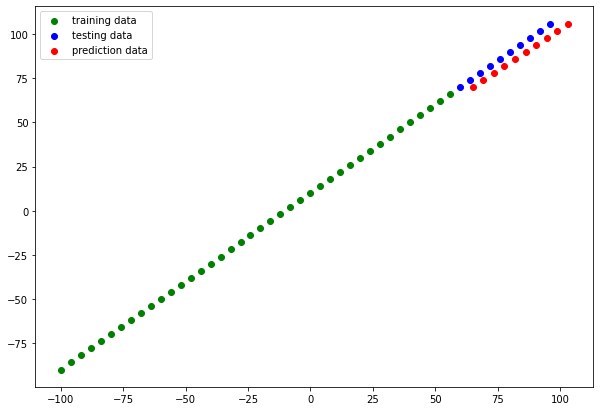

In [49]:
plot_evaluation(prediction=y_pred_1)

In [50]:
print(mae(true=y_test,pred=y_pred_1))
print(mse(true=y_test,pred=y_pred_1))
mae_1 = mae(true=y_test, pred=y_pred_1)
mse_1 = mse(true=y_test, pred = y_pred_1)
print(mae_1.numpy())
print(mse_1.numpy())

tf.Tensor(3.9769294, shape=(), dtype=float32)
tf.Tensor(16.306381, shape=(), dtype=float32)
3.9769294
16.306381


**Build model 2**

* 2 dense layers, trained for 100 epochs

In [51]:
tf.random.set_seed(43)
## creating model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

## compiling the model

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

## fitting the model
model_2.fit(tf.expand_dims(x_test, axis=1),y_test,epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 332ms/step - loss: 120.2906 - mae: 120.2906
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.9321 - mae: 12.9321
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 92.9492 - mae: 92.9492
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 72.5214 - mae: 72.5214
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 37.4591 - mae: 37.4591
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 72.1850 - mae: 72.1850
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 80.2365 - mae: 80.2365
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 63.4227 - mae: 63.4227
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 10.1782 - mae: 10.1782
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 158.5118 - mae: 158.5118
Epoch 11/100
1/1 [=============================

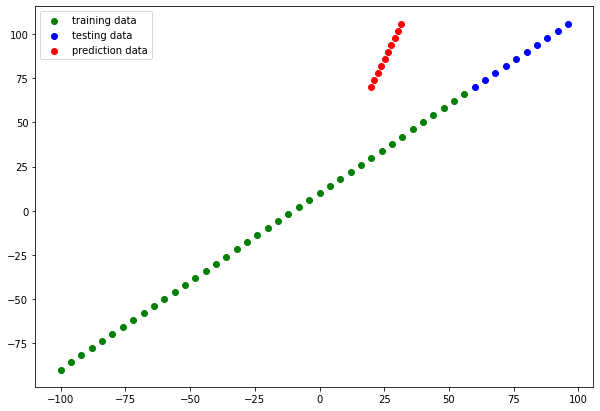

In [52]:
## making predictions and plotting
y_pred_2 = model_2.predict(x_test)
plot_evaluation(prediction=y_pred_2)

In [53]:
## Let's calculate evaluation
mae_2 = mae(true=y_test, pred=y_pred_2)
mse_2 = mse(true=y_test, pred=y_pred_2)
print(mae_2,mse_2)

tf.Tensor(62.22707, shape=(), dtype=float32) tf.Tensor(3932.4048, shape=(), dtype=float32)


**Build model 2**

* Model 3 with same layers but with 500 epochs

In [54]:
tf.random.set_seed(43)
# creating model 3

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

## compiling
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

## fitting the model

model_3.fit(tf.expand_dims(x_test,axis=1),y_test, epochs=500)


Epoch 1/500
1/1 [==============================] - 0s 327ms/step - loss: 120.2906 - mae: 120.2906
Epoch 2/500
1/1 [==============================] - 0s 15ms/step - loss: 12.9321 - mae: 12.9321
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 92.9492 - mae: 92.9492
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 72.5214 - mae: 72.5214
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 37.4591 - mae: 37.4591
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 72.1850 - mae: 72.1850
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 80.2365 - mae: 80.2365
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 63.4227 - mae: 63.4227
Epoch 9/500
1/1 [==============================] - 0s 16ms/step - loss: 10.1782 - mae: 10.1782
Epoch 10/500
1/1 [==============================] - 0s 12ms/step - loss: 158.5118 - mae: 158.5118
Epoch 11/500
1/1 [==============================

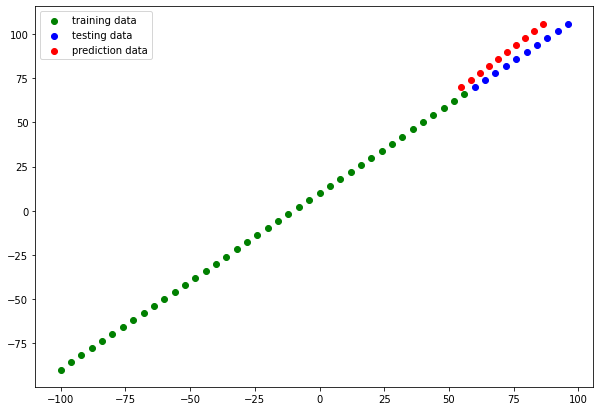

In [55]:
## making predictions and plotting
y_pred_3 = model_3.predict(x_test)
plot_evaluation(prediction=y_pred_3)

In [56]:
## checking metrics
mae_3 = mae(true=y_test, pred=y_pred_3)
mse_3 = mse(true=y_test, pred = y_pred_3)
print(mae_3, mse_3)

tf.Tensor(17.363672, shape=(), dtype=float32) tf.Tensor(303.49997, shape=(), dtype=float32)


### Let's try to compare the results of all our models by including them into a dataframe.

In [57]:
import pandas as pd
model_data = [["Model_1", mae_1.numpy(), mse_1.numpy()],
              ["Model_2", mae_2.numpy(), mse_2.numpy()],
              ["Model_3", mae_3.numpy(), mse_3.numpy()]]
model_data_df = pd.DataFrame(model_data, columns=['Model','MAE','MSE'])
model_data_df

,Model,MAE,MSE
0,Model_1,3.976929,16.306381
1,Model_2,62.227070,3932.404785
2,Model_3,17.363672,303.499969


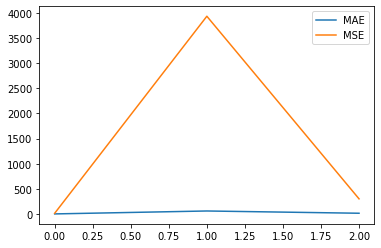

In [58]:
model_data_df.plot()

### Tracking your experiments

one really good habbit in machine learning modelling is to track the results of the experiments.

It can be tedious in doing so if experiments are large in number

We can utilise **Tensorboard** for it
and also **weights & biases** https://wandb.ai/site

## Saving the model
We can save the model in two formats
1. The SavedModel Format
2. The HDF5 format

In [59]:
import os
ROOT="/content/drive/MyDrive/Tensorflow certifications work"
os.chdir(ROOT)
!pwd

/content/drive/MyDrive/Tensorflow certifications work


In [60]:
## saving the model into savedmodel format
model_1.save("My_best_Model_in_saved_format")

In [61]:
## saving the model in hdf5 format
model_1.save("My_best_model_in_hdf5_format.h5")

## Loading the saved models

In [62]:
loaded_saved_model = tf.keras.models.load_model("/content/drive/MyDrive/Tensorflow certifications work/My_best_Model_in_saved_format")
loaded_saved_models_predictions = loaded_saved_model.predict(x_test)
loaded_saved_models_predictions

array([[ 64.92592 ],
       [ 69.16973 ],
       [ 73.41354 ],
       [ 77.65736 ],
       [ 81.90116 ],
       [ 86.14497 ],
       [ 90.38879 ],
       [ 94.6326  ],
       [ 98.87641 ],
       [103.120224]], dtype=float32)

In [63]:
## comparing the predictions of the loaded model to the model_1
model_1_predictions = model_1.predict(x_test)
loaded_saved_models_predictions == model_1_predictions

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [64]:
## comparing the mae of above both
mae_model_1 = mae(true=y_test,pred = model_1_predictions)
mae_loaded_model = mae(true=y_test, pred = loaded_saved_models_predictions)
print(mae_model_1 == mae_loaded_model)

tf.Tensor(True, shape=(), dtype=bool)


In [65]:
## Loading the h5 model
loaded_h5_model = tf.keras.models.load_model("/content/drive/MyDrive/Tensorflow certifications work/My_best_model_in_hdf5_format.h5")
loaded_h5_model_predictions = loaded_h5_model.predict(x_test)
model_1_predictions == loaded_h5_model_predictions

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## We observed that the loaded model is performing as same as the existing models

In [66]:
loaded_h5_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [67]:
loaded_saved_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [68]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Let's work on a larger dataset...Insurance premium prediction

In [69]:
## importing libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [70]:
## reading the csv file
df = pd.read_csv("https://raw.githubusercontent.com/nikhilpatil44/insurance-premium-prediction/main/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [71]:
df.shape

(1338, 7)

In [72]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [73]:
## Let's one hot encode the dataset for removing categorical features
insurance_one_hot = pd.get_dummies(df)
insurance_one_hot.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0


In [74]:
insurance_one_hot.dtypes

age                   int64
bmi                 float64
children              int64
expenses            float64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

## We know that we have increased the columns and not handled it effectively, our dataset has dummy variable trap but as of now we will try to develop the NN with this only later on we can work on fixing it.

In [75]:
## Let's create X, y values i.e features and labels
y = insurance_one_hot['expenses']
X = insurance_one_hot.drop("expenses", axis=1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1,0,0,1,0,0,0,1
1,18,33.8,1,0,1,1,0,0,0,1,0
2,28,33.0,3,0,1,1,0,0,0,1,0
3,33,22.7,0,0,1,1,0,0,1,0,0
4,32,28.9,0,0,1,1,0,0,1,0,0


In [76]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)
len(X_train),len(X_test), len(y_train), len(y_test)

(1003, 335, 1003, 335)

In [78]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
693,24,23.7,0,0,1,1,0,0,1,0,0
1297,28,26.5,2,1,0,1,0,0,0,1,0
634,51,39.7,1,0,1,1,0,0,0,0,1
1022,47,36.1,1,0,1,0,1,0,0,1,0
178,46,28.9,2,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.4,4,1,0,1,0,1,0,0,0
1130,39,23.9,5,1,0,1,0,0,0,1,0
1294,58,25.2,0,0,1,1,0,1,0,0,0
860,37,47.6,2,1,0,0,1,0,0,0,1


## Building a model now

In [79]:
tf.random.set_seed(42)

## creating model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(11),
    tf.keras.layers.Dense(1)
])

## compiling
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

## fitting
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 8670.5430 - mae: 8670.5430
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7705.8594 - mae: 7705.8594
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7612.2622 - mae: 7612.2622
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7651.1738 - mae: 7651.1738
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 7687.1924 - mae: 7687.1919
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7682.4946 - mae: 7682.4946
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7442.0186 - mae: 7442.0186
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7511.2334 - mae: 7511.2334
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 7573.6187 - mae: 7573.6187
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7562.2573 - mae: 7562.2573

In [80]:
## check the result on test data
insurance_model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 6316.6177 - mae: 6316.6177


[6316.61767578125, 6316.61767578125]

In [81]:
## Let's check the mean and median of the train data 
y_train.mean(), y_train.median()

(13267.935952143569, 9447.38)

### Looks like our model is not working too well, because the mean shows 13267 and we are charging around 6316 less or more than that. Let's try few more models

**Model 2**
* More layers, with 100 epochs
* More layers, with 500 epochs
* More layers, with Adam with 0.0001 lr, epochs = 100
* More layers, with Adam with 0.0001 lr, epochs = 500

In [82]:
## Model 2
tf.random.set_seed(43)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(110),
    tf.keras.layers.Dense(55),
    tf.keras.layers.Dense(11),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.SGD(),
                          metrics = ["mae"])

insurance_model_2.fit(X_train,y_train, epochs = 100)



Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 12/100
32/32 [==========

In [83]:
insurance_model_2.evaluate(X_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

### As observed from above looks like the model is exploding the gradients hence it is not able to interpret the results. So let's use Adam optimizer in another model.

In [84]:
## Model 3
tf.random.set_seed(43)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(110),
    tf.keras.layers.Dense(55),
    tf.keras.layers.Dense(11),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

insurance_model_3.fit(X_train,y_train, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 13121.8340 - mae: 13121.8340
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 12162.2451 - mae: 12162.2451
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 9031.1387 - mae: 9031.1387
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7468.0190 - mae: 7468.0190
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7360.7681 - mae: 7360.7681
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7311.9233 - mae: 7311.9233
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7262.6367 - mae: 7262.6367
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7205.5430 - mae: 7205.5430
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7136.6289 - mae: 7136.6289
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7079.8354 - mae: 7079.

In [85]:
insurance_model_3.evaluate(X_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 3515.8496 - mae: 3515.8496


[3515.849609375, 3515.849609375]

In [86]:
insurance_model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 6316.6177 - mae: 6316.6177


[6316.61767578125, 6316.61767578125]

## We observed good amount of reduction in the loss in model 3 from model 1

In [ ]:
## Model 4

tf.random.set_seed(43)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(110),
    tf.keras.layers.Dense(55),
    tf.keras.layers.Dense(11),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

history = insurance_model_4.fit(X_train, y_train, epochs = 300)

Epoch 1/300
32/32 [==============================] - 1s 2ms/step - loss: 13121.8340 - mae: 13121.8340
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 12162.2451 - mae: 12162.2451
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 9031.1387 - mae: 9031.1387
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 7468.0190 - mae: 7468.0190
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 7360.7681 - mae: 7360.7681
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 7311.9233 - mae: 7311.9233
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 7262.6367 - mae: 7262.6367
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 7205.5430 - mae: 7205.5430
Epoch 9/300
32/32 [==============================] - 0s 3ms/step - loss: 7136.6289 - mae: 7136.6289
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - loss: 7079.8354 - mae: 7079.

In [ ]:
insurance_model_4.evaluate(X_test,y_test)

In [ ]:
insurance_model_3.evaluate(X_test,y_test)

## History will store all the losses and we can use it to plot the loss curve

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## The above graph shows that from 200 onwards there wasn't much change in the losses